In [1]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
from os import listdir,makedirs
from os.path import isfile,join
import cv2

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout,  Conv2D, Input, Lambda, Flatten, TimeDistributed
from tensorflow.keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers.core import Dense, Dropout, Activation
import np_utils
from keras.src.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Activation,Layer
#from keras.engine.topology import Layer
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import LeakyReLU

2024-04-22 18:15:25.972063: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 18:15:25.974986: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 18:15:26.015321: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 18:15:26.015349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 18:15:26.016320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
import os
import shutil
#gt=os.path.join('/content/drive/MyDrive/Anomaly/BTech_Dataset_transformed/02/ground_truth')
#train_path='/content/drive/MyDrive/Anomaly/BTech_Dataset_transformed/02/train/ok'
#test_path='/content/drive/MyDrive/Anomaly/BTech_Dataset_transformed/02/test/ko'

# gt=os.path.join('/home/ai/Pritha/mvt/wood/ground_truth/bent/')
# train_path='/home/ai/Pritha/mvt/grid/train/good/'
# test_path='/home/ai/Pritha/mvt/grid/test/bent/'

gt=os.path.join('/home/ai/Pritha/VisA_20220922/candle/Data/Masks/Anomaly')
train_path='/home/ai/Pritha/VisA_20220922/candle/Data/Images/Normal'
test_path='/home/ai/Pritha/VisA_20220922/candle/Data/Images/Anomaly'

In [3]:
SIZE=128
batch_size = 20
from os.path import join

sz=len(os.listdir(train_path))
sz1=len(os.listdir(test_path))
y_train=np.zeros(sz)
train=np.zeros(shape=(sz,SIZE,SIZE,3))
merge=np.zeros(shape=((sz+sz1),SIZE,SIZE,3))
cnt=0
k=0
for r in os.listdir(train_path):
  img=Image.open(join(train_path,r)).resize((SIZE,SIZE))
  img=np.array(img,dtype=np.float32)/float(256)
  print(img.shape) 
  train[cnt,:,:,:]=img
  merge[k,:,:,:]=img
  y_train[cnt]=0
  cnt=cnt+1
  k=k+1
print('y_train')
print(y_train.shape)

test=np.zeros(shape=(sz1,SIZE,SIZE,3))
y_test=np.zeros(sz1)
cnt=0
for r in os.listdir(test_path):
  img=Image.open(join(test_path,r)).resize((SIZE,SIZE))
  img=np.array(img,dtype=np.float32)/float(256)
  test[cnt,:,:,:]=img
  merge[k,:,:,:]=img
  y_test[cnt]=1
  cnt=cnt+1
  k=k+1

X_train=train
X_test=test
#X_train = X_train.astype('float32') / 255.
#X_test = X_test.astype('float32') / 255.
#X_train = np.reshape(X_train, (len(X_train), SIZE, SIZE,3))
#X_test = np.reshape(X_test, (len(X_test), SIZE, SIZE, 3))

X_test.shape


#plt.imshow(X_test[2])

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

(100, 128, 128, 3)

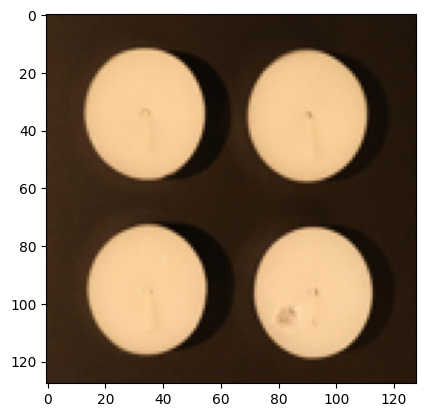

In [4]:
plt.imshow(X_test[2])

In [6]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

validation_generator =datagen.flow(X_train, y_train, batch_size=batch_size)


anomaly_generator = datagen.flow(X_test, y_test , batch_size=batch_size)

print(train_generator)

In [7]:
path = '/home/ai/Pritha/VisA_20220922/candle/Data/Images/Anomaly' # Source Folder
dstpath = 'candle/test/1_defective/defective' # Destination Folder
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")

files = list(filter(lambda f: isfile(join(path,f)), listdir(path)))
for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        #gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,img)
    except:
        print ("{} is not converted".format(image))

path = '/home/ai/Pritha/VisA_20220922/candle/Data/Images/Normal' # Source Folder
dstpath = 'candle/test/1_good/good'  # Destination Folder
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")

files = list(filter(lambda f: isfile(join(path,f)), listdir(path)))
for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        #gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,img)
    except:
        print ("{} is not converted".format(image))

Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder


In [8]:
image_size = 128
batch_size = 10
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    'candle/test/1_good/',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='input'
    )

validation_generator = datagen.flow_from_directory(
    'candle/test/1_good/',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='input'
    )

anomaly_generator = datagen.flow_from_directory(
    'candle/test/1_defective/',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='input'
    )

test_generator = datagen.flow_from_directory(
    'candle/test',
    target_size=(image_size, image_size),
    batch_size=1,
    class_mode='binary'
    )

Found 1000 images belonging to 1 classes.
Found 1000 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 1100 images belonging to 2 classes.


In [5]:
from tensorflow.python.ops.math_ops import xdivy
def SSIMLoss(y_true, y_pred):
    print(y_pred.shape)
    print(y_true.shape)
   # y_pred = tf.reshape(y_pred,[-1,128,128,1])
   # y_true = tf.reshape(y_true,[-1,128,128,1])
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred,1.0))

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the Autoencoder with Attention
def autoencoder_with_attention(input_shape):
    # Encoder
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    print(x.shape)
    x = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    print(x.shape)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    print(x.shape)

    # # Attention Mechanism
    # attention = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(x)
    # print(attention.shape)
    # #attention = layers.UpSampling2D((2, 2))(attention)
    # #attention = layers.UpSampling2D((2, 2))(attention)
    # print(attention.shape)
    # attention = layers.multiply([x, attention])

    # Decoder
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.UpSampling2D((2, 2))(x)
    print(x.shape)
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.UpSampling2D((2, 2))(x)
    print(x.shape)
    x = layers.Conv2D(32, (3, 3), padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    #x = layers.UpSampling2D((2, 2))(x)
    
    print(x.shape)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    print(decoded.shape)


    # Model
    model = models.Model(inputs, decoded)
    return model

# Example usage
input_shape = (128, 128, 3)  # Adjust input shape based on your data
model = autoencoder_with_attention(input_shape)
#model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

(None, 64, 64, 32)
(None, 64, 64, 64)
(None, 32, 32, 128)
(None, 64, 64, 128)
(None, 128, 128, 64)
(None, 128, 128, 32)
(None, 128, 128, 3)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                     

2024-04-22 18:15:49.436823: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


/home/ai/anaconda3/envs/py39tf215cpu/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/3000
(50, 128, 128, 3)
(50, 128, 128, 3)


2024-04-20 12:01:06.310857: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'gradient_tape/model/leaky_re_lu_1/LeakyRelu/LeakyReluGrad' exist for missing node 'model/conv2d_1/BiasAdd'.


20/20 [==============================] - ETA: 0s - loss: 0.3754(None, 128, 128, 3)
(None, 128, 128, 3)
20/20 [==============================] - 53s 3s/step - loss: 0.3754 - val_loss: 0.1469
Epoch 2/3000
20/20 [==============================] - 51s 3s/step - loss: 0.1062 - val_loss: 0.0905
Epoch 3/3000
20/20 [==============================] - 51s 3s/step - loss: 0.0664 - val_loss: 0.0611
Epoch 4/3000
20/20 [==============================] - 51s 3s/step - loss: 0.0523 - val_loss: 0.0549
Epoch 5/3000
20/20 [==============================] - 65s 3s/step - loss: 0.0451 - val_loss: 0.0491
Epoch 6/3000
20/20 [==============================] - 68s 3s/step - loss: 0.0414 - val_loss: 0.0489
Epoch 7/3000
20/20 [==============================] - 73s 4s/step - loss: 0.0423 - val_loss: 0.0420
Epoch 8/3000
20/20 [==============================] - 82s 4s/step - loss: 0.0373 - val_loss: 0.0400
Epoch 9/3000
20/20 [==============================] - 79s 4s/step - loss: 0.0355 - val_loss: 0.0382
Epoch 10/3

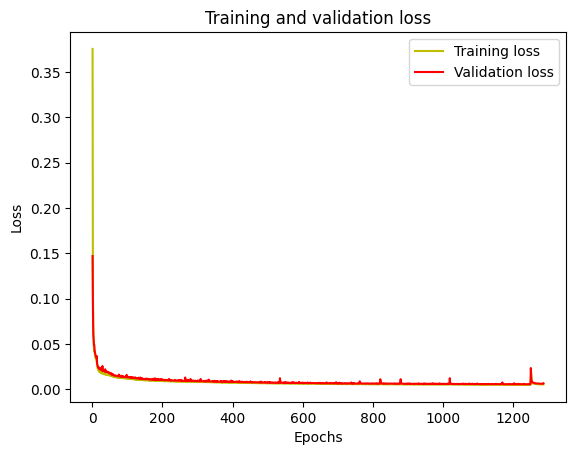

In [7]:

from keras.models import load_model
#from tf.keras import get_custom_objects

#get_custom_objects().update({'SSIMLoss': SSIMLoss})

import keras.losses

keras.losses.custom_loss = SSIMLoss

model.compile(optimizer='adam', loss='SSIMLoss')

model.save('candle_a.h5')
model = tf.keras.models.load_model('candle_a.h5',custom_objects ={'SSIMLoss':SSIMLoss})
#(X_train, X_train)
# Training the model
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50) # Early stopping (stops training when validation doesn't improve for {patience} epochs)
model_filepath = 'candle_a.h5'
save_best = keras.callbacks.ModelCheckpoint(model_filepath, monitor='val_loss', save_best_only=True, mode='min') # Saves the best version of the model to disk (as measured on the validation data set)
# history= model.fit_generator(
#         train_generator,
#         epochs=300,
#         validation_data=validation_generator,
#         shuffle = True,
#         callbacks=[es, save_best])

history = model.fit(
       X_train,X_train,
       steps_per_epoch= 20 ,#// batch_size,
       epochs=3000,
       validation_data=(X_test,X_test),
      # validation_steps=75 // batch_size,
       shuffle = True,
callbacks=[es, save_best])

#plot the training and validation accuracy and loss at each epoch
model.save('candle_a.h5')
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

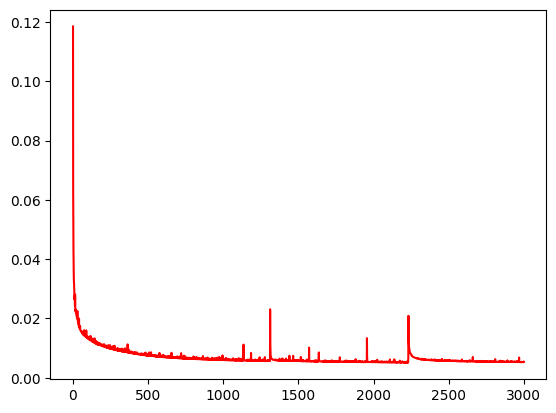

In [13]:
plt.plot(epochs, val_loss, 'r', label='Validation loss')

1/1 [==============================] - 0s 162ms/step


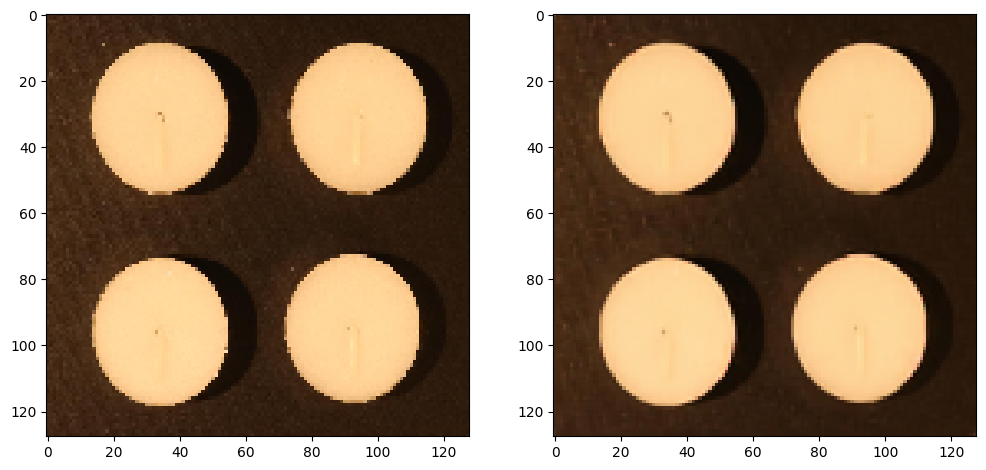

In [14]:
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])  #Predict on the first batch of images
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

32/32 [==============================] - 5s 165ms/step


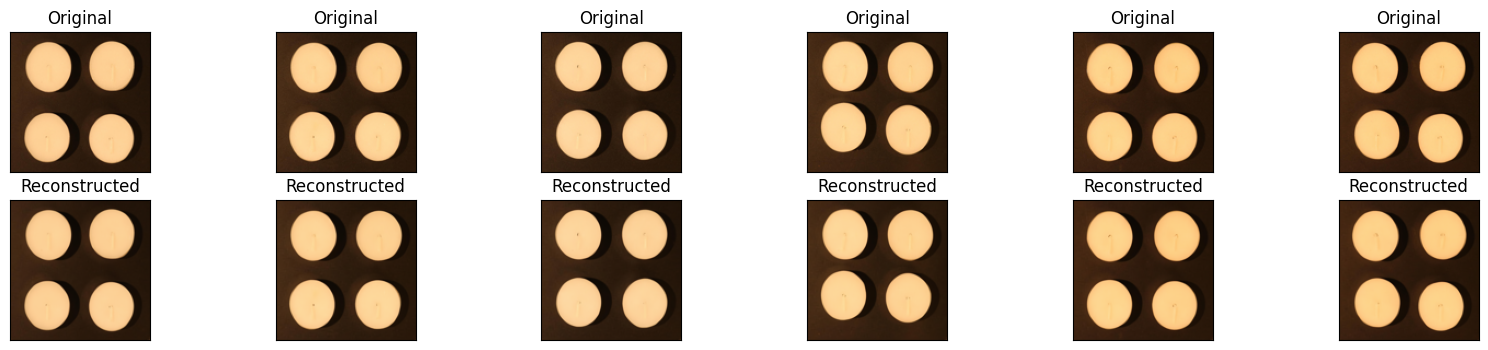

In [15]:
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])

decoded_imgs = model.predict(X_train)
n = 6
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    plt.title("Original")
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Reconstructed")
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [8]:
import keras.losses

keras.losses.custom_loss = SSIMLoss

model.compile(optimizer='adam', loss='SSIMLoss')

model = tf.keras.models.load_model('candle_a.h5',custom_objects ={'SSIMLoss':SSIMLoss})

(128, 128, 3)
(128, 128, 3)


NameError: name 'decoded_imgs' is not defined

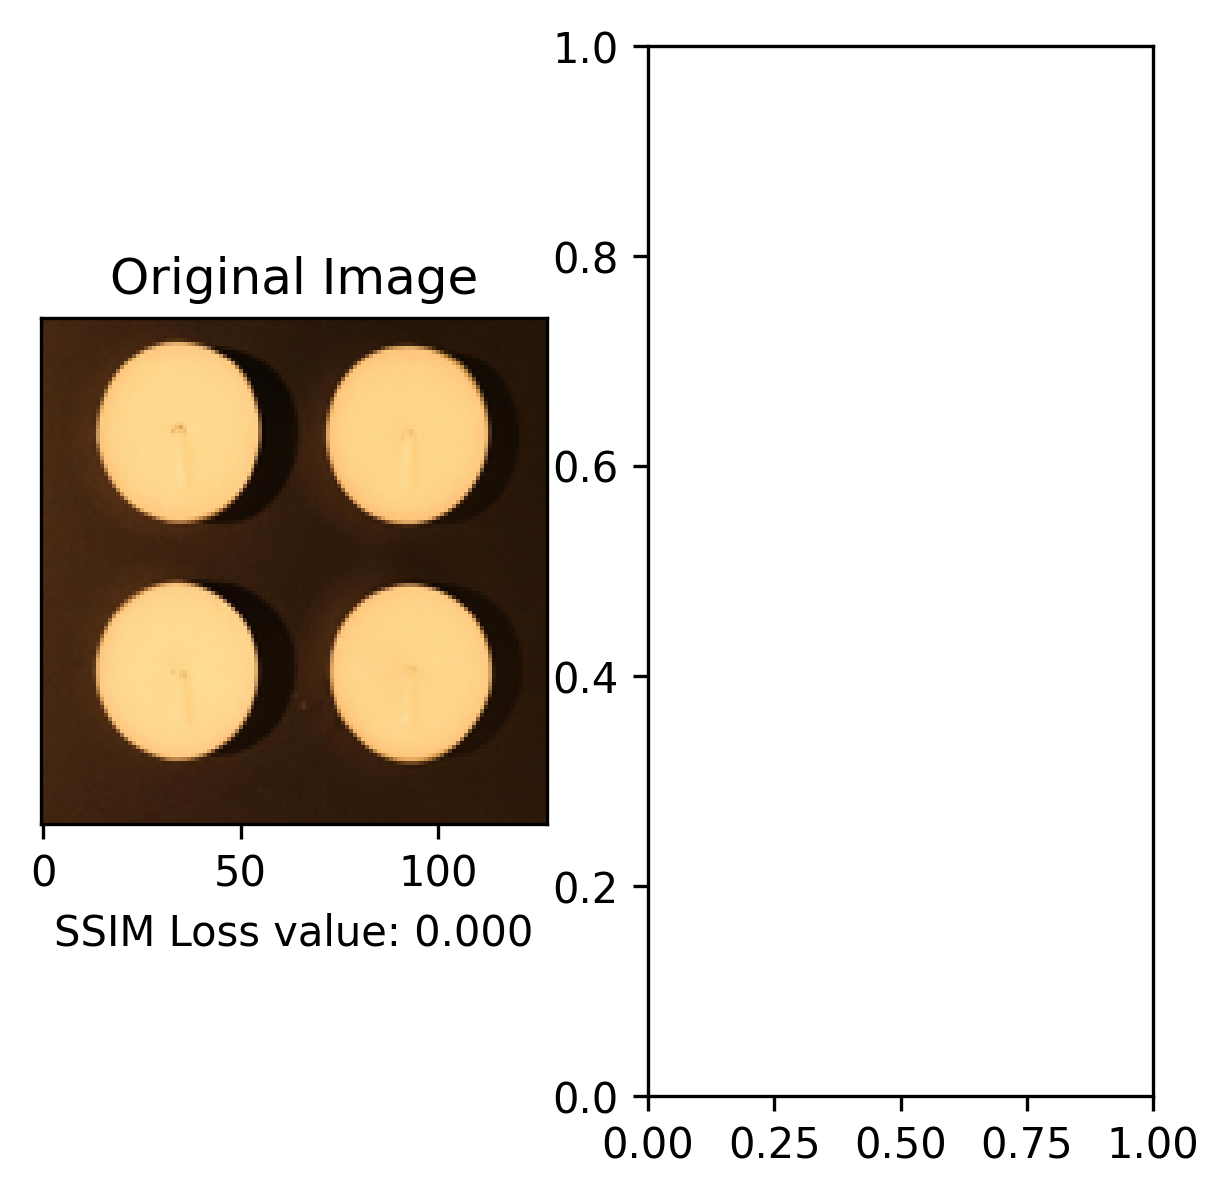

In [9]:
n = 2 # how many encoded and decoded images we will display
#decoded_imgs= model.predict(X_train)
#decoded_mnistimgs= model.predict(X_test)
plt.figure(figsize=(10, 10), dpi=300)
#plt.subplots_adjust( wspace=0.1, hspace=0.07)
plt_a=1
SSIM_array=[]
for i in range(n):
    # Original training dataset vs Original training
    ax = plt.subplot(2, 4, plt_a   )
    plt.imshow(X_train[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    value_a = SSIMLoss(X_train[i], X_train[i])

    ax.set_title("Original Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )

    # Reconstructed good data  vs Original training data
    ax = plt.subplot(2, 4, plt_a + 1 )
    plt.imshow(decoded_imgs[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    gg=tf.dtypes.cast(X_train[i], tf.float32)
    value_a = SSIMLoss(decoded_imgs[i], gg)
    SSIM_array.append(value_a)
    ax.set_title("Reconstructed Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )

    ax = plt.subplot(2, 4, plt_a + 2 )
    plt.imshow(X_test[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.set_title("Anomalus Image " )
    ax.get_yaxis().set_visible(False)



    # Reconstructed anomalous data  vs Original training data
    ax = plt.subplot(2, 4, plt_a + 3)
    plt.imshow(decoded_mnistimgs[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    gg1=tf.dtypes.cast(X_test[i], tf.float32)
    value = SSIMLoss(decoded_mnistimgs[i], gg1)
    SSIM_array.append(value)
    label = 'SSIM Loss value: {:.3f}'
    ax.set_title("Ano Reconst. Image" )
    ax.set_xlabel(label.format(value) )


    
    #gg=tf.dtypes.cast(X_train[i], tf.float32)
    plt_a+=1
plt.show()

4/4 [==============================] - 1s 120ms/step
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


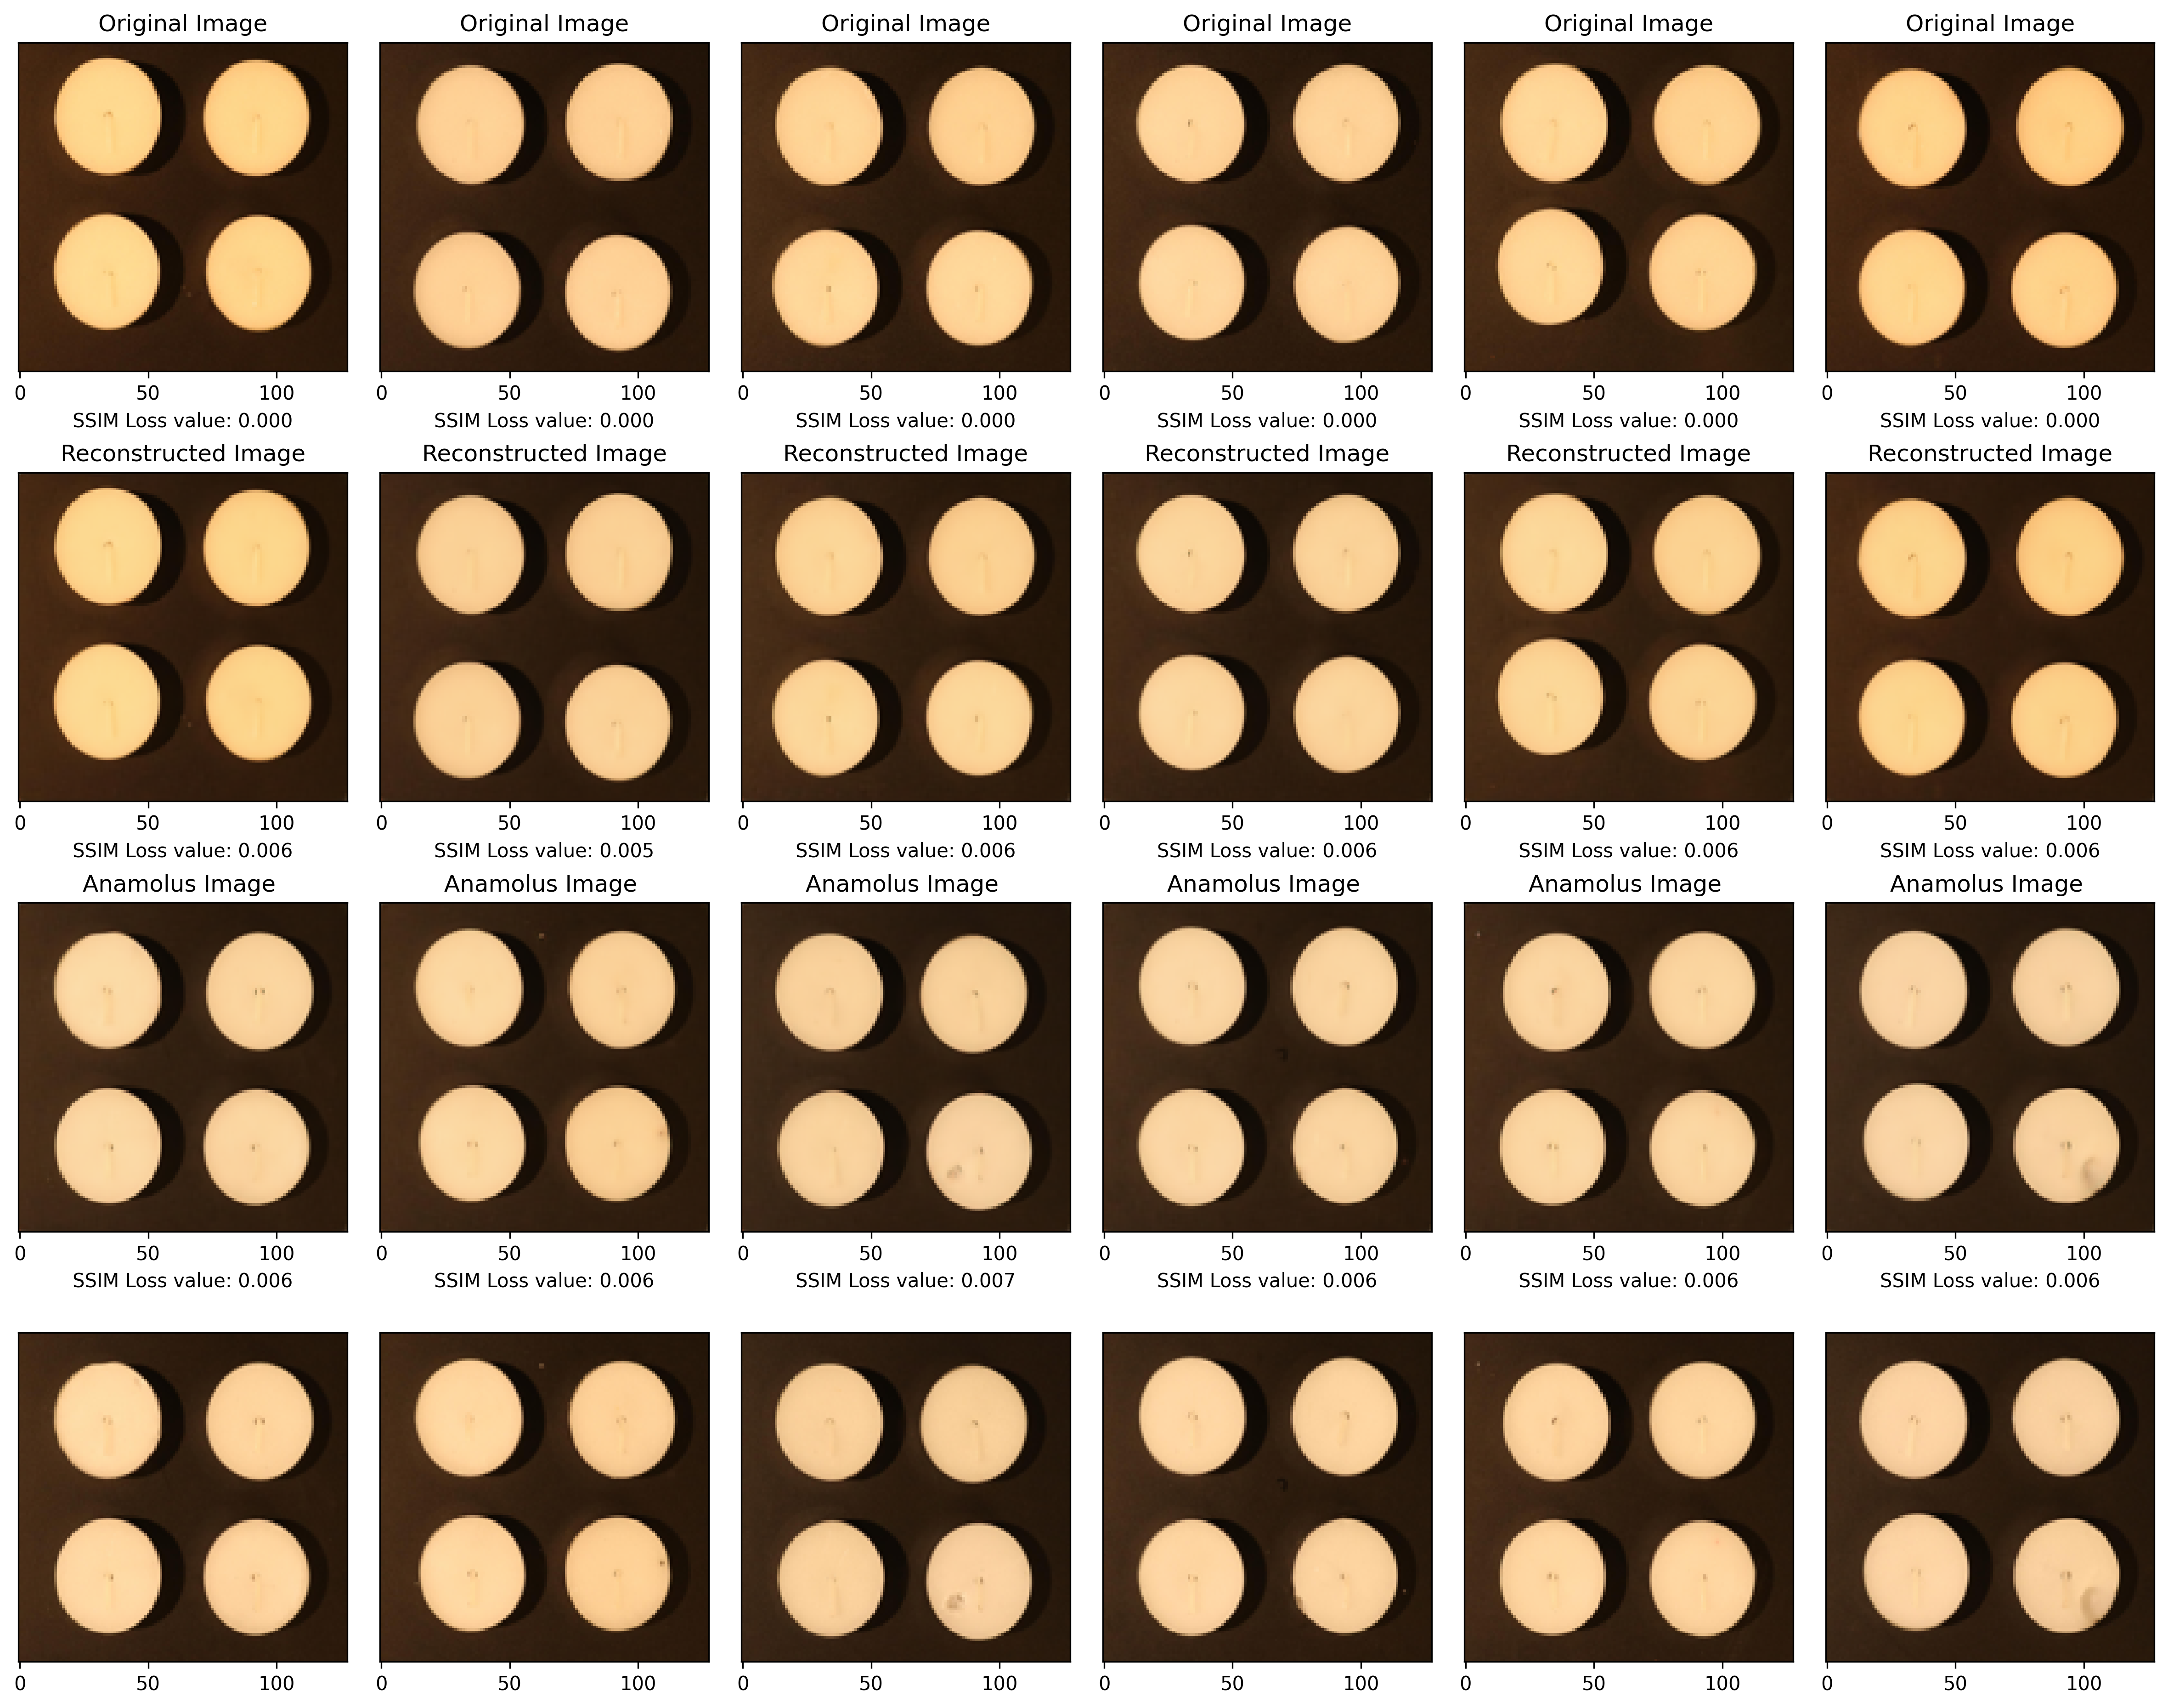

In [10]:
n = 6  # how many encoded and decoded images we will display
decoded_imgs= model.predict(X_train)
decoded_mnistimgs= model.predict(X_test)
plt.figure(figsize=(20, 20), dpi=300)
plt.subplots_adjust( wspace=0.1, hspace=0.07)
plt_a=1
SSIM_array=[]
for i in range(n):
    # Original training dataset vs Original training
    ax = plt.subplot(5, n, plt_a   )
    plt.imshow(X_train[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    value_a = SSIMLoss(X_train[i], X_train[i])

    ax.set_title("Original Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )

    # Reconstructed good data  vs Original training data
    ax = plt.subplot(5, n, plt_a + n )
    plt.imshow(decoded_imgs[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    gg=tf.dtypes.cast(X_train[i], tf.float32)
    value_a = SSIMLoss(decoded_imgs[i], gg)
    SSIM_array.append(value_a)
    ax.set_title("Reconstructed Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )



    # Reconstructed anomalous data  vs Original training data
    ax = plt.subplot(5, n, plt_a + 2*n)
    plt.imshow(decoded_mnistimgs[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    gg1=tf.dtypes.cast(X_test[i], tf.float32)
    value = SSIMLoss(decoded_mnistimgs[i], gg1)
    SSIM_array.append(value)
    label = 'SSIM Loss value: {:.3f}'
    ax.set_title("Anamolus Image " )
    ax.set_xlabel(label.format(value) )


    ax = plt.subplot(5, n, plt_a + 3*n )
    plt.imshow(X_test[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    #gg=tf.dtypes.cast(X_train[i], tf.float32)
    plt_a+=1
plt.show()

In [11]:
SSIM_arr=[]
gt_arr=[]
for i in range(len(decoded_imgs)):
  gg=tf.dtypes.cast(X_train[i], tf.float32)
  value_a = SSIMLoss(decoded_imgs[i], gg)
  SSIM_arr.append(value_a)
  gt_arr.append(0)


for i in range(len(decoded_mnistimgs)):
  gg1=tf.dtypes.cast(X_test[i], tf.float32)
  value_a = SSIMLoss(decoded_mnistimgs[i], gg1)
  SSIM_arr.append(value_a)
  gt_arr.append(1)
print(len(SSIM_arr))

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [12]:
print(np.array(SSIM_arr))
print(np.array(gt_arr))

[0.00581545 0.00517803 0.00593299 ... 0.00660616 0.00572109 0.00623554]
[0 0 0 ... 1 1 1]


In [13]:
np.save("gt_arr.npy",np.array(gt_arr))
np.save("SSIM_arr.npy",np.array(SSIM_arr))

In [14]:
#np_load_old = np.load

# modify the default parameters of np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
y_true = np.load('SSIM_arr.npy') #FL preidcted regularity scores
print('Shape of SSIM_arr', y_true.shape)
y_pred = np.load('gt_arr.npy') #FL ground truth
print('gt_arr.npy', y_pred.shape)
#np.load = np_load_old

Shape of SSIM_arr (1100,)
gt_arr.npy (1100,)


Text(0, 0.5, 'True Positive Rate')

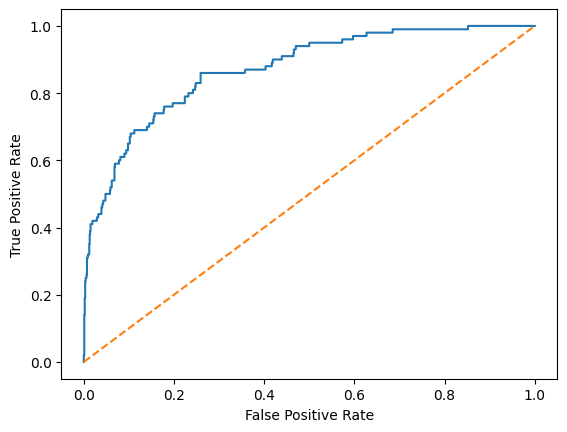

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, auc
from numpy import sqrt
from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_pred, y_true)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC-ROC curve = %0.3f' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--', label='Binary Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

0.224
0.22999999999999998
Area under the ROC curve : 0.871435
Best Threshold=0.005954, G-Mean=0.798
AUC-ROC=0.871435


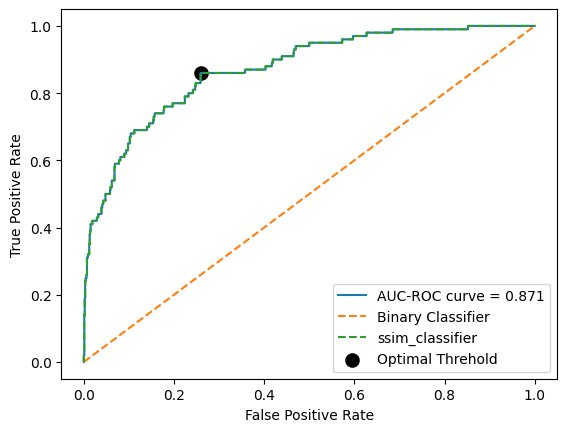

In [16]:
dataset_name="candle"
fpr, tpr, threshold = roc_curve(y_pred, y_true, pos_label=1)
fnr = 1 - tpr
tnr= 1- fpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
n=np.array([tpr, fpr])
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
print(EER)

#as a sanity check the value should be close to

EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]

print(EER)
print("Area under the ROC curve : %f" % roc_auc)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print('AUC-ROC=%f'  % (roc_auc))
th=thresholds[ix]
plt.clf()
plt.plot(fpr, tpr, label='AUC-ROC curve = %0.3f' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--', label='Binary Classifier')
plt.plot(fpr, tpr, linestyle='--', label='ssim_classifier')
#pyplot.plot(roc_auc='.', label='AUC-ROC')
#pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', s=90, label='Best')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', s=90, label='Optimal Threhold')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.savefig(f'{dataset_name}_OT.jpg')
plt.show()

In [17]:
print(y_pred)
y_pred_binary=[]

for i in y_true:
  if i >=th:
    y_pred_binary.append(1)
  else:
    y_pred_binary.append(0)

y_pred_binary_1=np.array(y_pred_binary )
print(np.array(y_pred_binary))


tn, fp, fn, tp =confusion_matrix(y_pred,y_pred_binary_1).ravel()
acc=(tn+tp)/(tn+ fp+ fn+ tp)*100
print(confusion_matrix(y_pred,y_pred_binary_1))
acc

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 0 1]
[[741 259]
 [ 14  86]]


75.18181818181819

In [18]:
import csv
print(np.transpose(n))

rows = ["{},{}".format(i, j) for i, j in np.transpose(n)]
text = "\n".join(rows)
              #  adding header
headerList = ['i_tpr', 'i_fpr']


                # converting data frame to csv
with open(f'{dataset_name}_image.csv', 'w') as f:
    dw = csv.DictWriter(f, delimiter=',',fieldnames=headerList)
    dw.writeheader()
    f.write(text)
                
print("-------------------------in_display2---------------------------")
                
print(tpr,fpr)

[[0.    0.   ]
 [0.01  0.   ]
 [0.02  0.   ]
 [0.02  0.001]
 [0.14  0.001]
 [0.14  0.002]
 [0.19  0.002]
 [0.19  0.003]
 [0.24  0.003]
 [0.24  0.004]
 [0.25  0.004]
 [0.25  0.006]
 [0.26  0.006]
 [0.26  0.007]
 [0.31  0.007]
 [0.31  0.009]
 [0.32  0.009]
 [0.32  0.012]
 [0.35  0.012]
 [0.35  0.013]
 [0.38  0.013]
 [0.38  0.014]
 [0.39  0.014]
 [0.39  0.015]
 [0.41  0.015]
 [0.41  0.019]
 [0.42  0.019]
 [0.42  0.029]
 [0.43  0.029]
 [0.43  0.032]
 [0.44  0.032]
 [0.44  0.039]
 [0.46  0.039]
 [0.46  0.041]
 [0.47  0.041]
 [0.47  0.043]
 [0.48  0.043]
 [0.48  0.048]
 [0.5   0.048]
 [0.5   0.058]
 [0.51  0.058]
 [0.51  0.059]
 [0.52  0.059]
 [0.52  0.062]
 [0.54  0.062]
 [0.54  0.068]
 [0.58  0.068]
 [0.58  0.069]
 [0.59  0.069]
 [0.59  0.078]
 [0.6   0.078]
 [0.6   0.081]
 [0.61  0.081]
 [0.61  0.082]
 [0.61  0.084]
 [0.61  0.09 ]
 [0.62  0.09 ]
 [0.62  0.094]
 [0.63  0.094]
 [0.63  0.098]
 [0.65  0.098]
 [0.65  0.102]
 [0.67  0.102]
 [0.67  0.104]
 [0.68  0.104]
 [0.68  0.112]
 [0.69  0.

In [19]:
f1_score(y_pred_binary,y_pred)

0.3865168539325843

In [25]:
from sklearn.metrics import average_precision_score

average_precision_score(y_pred, y_pred_binary)

0.2634918219855458

Best Threshold=0.005266, F-Score=0.538


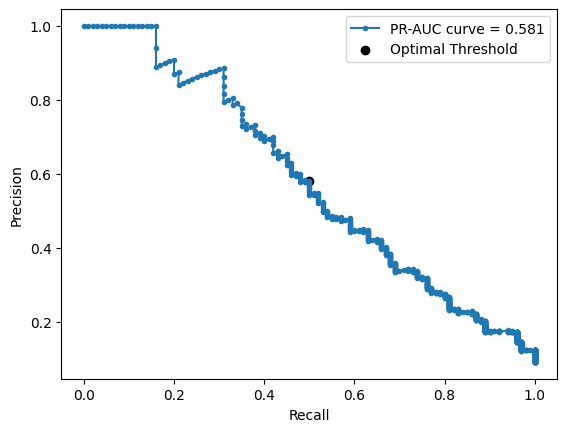

[[1.         0.09090909]
 [1.         0.09099181]
 [1.         0.09107468]
 ...
 [0.02       1.        ]
 [0.01       1.        ]
 [0.         1.        ]]
-------------------------in_display2---------------------------
[0.09090909 0.09099181 0.09107468 ... 1.         1.         1.        ] [1.   1.   1.   ... 0.02 0.01 0.  ]


In [26]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

precision, recall, thresholds = precision_recall_curve(y_pred, y_true)
auc_score = auc(recall, precision)
p=np.array([recall, precision])
#pyplot.plot(recall, precision, marker='.', label='Logistic')
# convert to f score

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
#no_skill = len(testy[testy==1]) / len(testy)
#pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='Binary')
pyplot.plot(recall, precision, marker='.',label='PR-AUC curve = %0.3f' % auc_score)
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Optimal Threshold')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

import csv
print(np.transpose(p))

rows = ["{},{}".format(i, j) for i, j in np.transpose(p)]
text = "\n".join(rows)
              #  adding header
headerList = ['recall', 'precision']


                # converting data frame to csv
with open(f'{dataset_name}_pr.csv', 'w') as f:
    dw = csv.DictWriter(f, delimiter=',',fieldnames=headerList)
    dw.writeheader()
    f.write(text)
                
print("-------------------------in_display2---------------------------")
                
print(precision, recall)

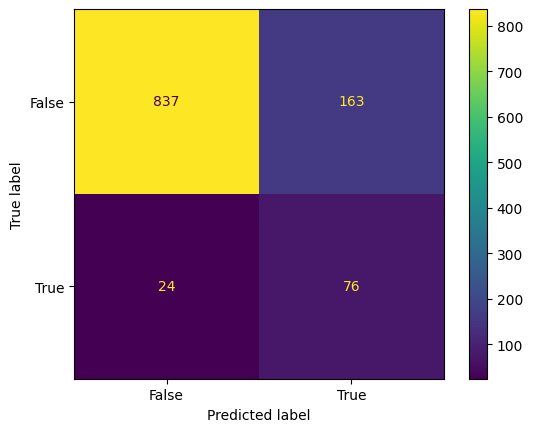

In [27]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

 

confusion_matrix = metrics.confusion_matrix(y_pred,y_pred_binary_1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.savefig(f'{dataset_name}_conmat.jpg')
plt.show() 

4/4 [==============================] - 1s 125ms/step
128
128
(128, 128, 1)


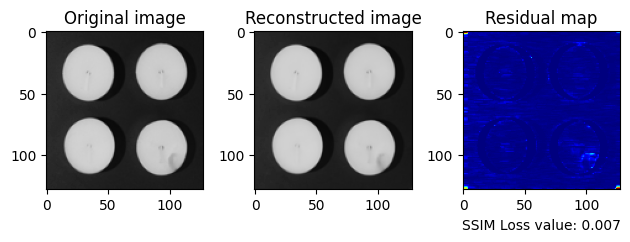

In [43]:
from skimage.metrics import structural_similarity as ski_ssim
fig, ax = plt.subplots(1, 3)
plt.gray()   
SIZE=128
cnt=0
t_img=np.zeros(shape=(1,SIZE,SIZE,3))


    
    # img = Image.open(image_path).resize((128,128))
    # original=img
    # img=np.array(img,dtype=np.float32)/float(256)
    # t_img[k,:,:,:]=img
    # print(t_img.shape)  
#img=Image.open(test_image_path_1).resize((SIZE,SIZE))

reconstructed= model.predict(X_test)

(row, col) = X_test[2].shape[0:2]
print(row)
print(col)
#img1= [[0] * row] * col
img1=np.zeros(shape=(row,col,1))
#img1=np.squeeze(img1)

img2=np.zeros(shape=(row,col,1))
#img2=np.squeeze(img1)
# Take the average of pixel values of the BGR Channels
# to convert the colored image to grayscale image
for i in range(row):
    for j in range(col):
        # Find the average of the BGR pixel values
        img1[i, j] = sum(X_test[5][i, j]) * 0.33
        img2[i, j] = sum(reconstructed[5][i, j]) * 0.33

print(img2.shape)
# img1 = cv2.imread(img, 0)
# img2 = cv2.imread(img_noise, 0)
# img1 = tensorify(img) # helper function to convert cv2 image to tensors
# img2 = tensorify(img)
#mse_none = mean_squared_error(img1, img1)
#ssim_none = ski_ssim(img1, img1, data_range=img.max() - img.min())

img_old=np.array(img1.squeeze(2))
img_new=np.array(img2.squeeze(2))

#mse_noise = mean_squared_error(img, img_noise)
# pixel_range = max(np.max(img1), np.max(img2)) - min(np.min(img1), np.min(img2))
# j,S = ski_ssim(img1, img2,
#                   full=True, channel_axis=False, data_range=pixel_range)
# print(pixel_range)
pixel_range = max(np.max(img_old), np.max(img_new)) - min(np.min(img_old), np.min(img_new))
j,S = ski_ssim(img_old, img_new, full=True, channel_axis=0, data_range=pixel_range)
# mse_const = mean_squared_error(img, img_const)
#ssim_const = ski_ssim(img_old, img_new)

ax[0].imshow(img1, cmap=plt.cm.gray, vmin=0, vmax=1)
#ax[0].set_xlabel(f'MSE: {mse_none:.2f}, SSIM: {ssim_none:.2f}')
ax[0].set_title('Original image')

ax[1].imshow(img2, cmap=plt.cm.gray, vmin=0, vmax=1)
#ax[1].set_xlabel(f'MSE: {mse_noise:.2f}, SSIM: {ssim_noise:.2f}')
ax[1].set_title('Reconstructed image')

# ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
# ax[2].set_xlabel(f'MSE: {mse_const:.2f}, SSIM: {ssim_const:.2f}')
# ax[2].set_title('Image plus constant')

ax[2].imshow(1-S, vmax = 0.5,cmap='jet')
ax[2].set_xlabel(f'SSIM Loss value: {1-j:.3f}')
ax[2].set_title("Residual map")

plt.tight_layout()
plt.savefig(f'{dataset_name}_Residual_map.jpg')
plt.show()

4/4 [==============================] - 1s 143ms/step
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


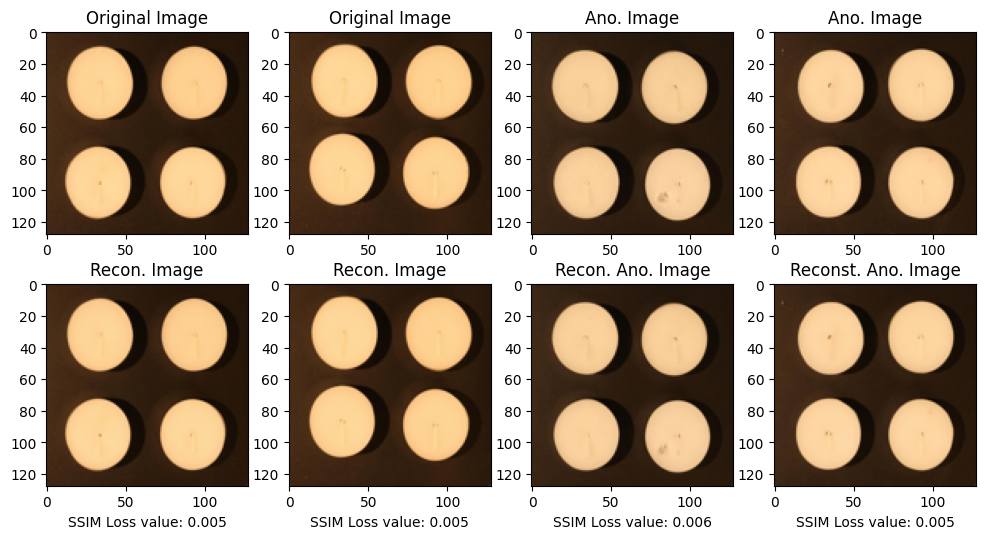

In [56]:
plt.figure(figsize=(12, 6))
decoded_imgs= model.predict(X_train)
decoded_mnistimgs= model.predict(X_test)
i=2
j=4
ax = plt.subplot(2, 4, 1 )
plt.imshow(X_train[i].reshape(SIZE,SIZE,3))
ax.set_title("Original Image")
ax = plt.subplot(2, 4, 2 )
plt.imshow(X_train[j].reshape(SIZE,SIZE,3))
ax.set_title("Original Image")
ax = plt.subplot(2, 4, 3 )
plt.imshow(X_test[i].reshape(SIZE,SIZE,3))
ax.set_title("Ano. Image") 

ax = plt.subplot(2, 4, 4 )
plt.imshow(X_test[j].reshape(SIZE,SIZE,3))
ax.set_title("Ano. Image")


ax = plt.subplot(2, 4, 5 )
plt.imshow(decoded_imgs[i].reshape(SIZE,SIZE,3))
ax.set_title("Recon. Image")
gg=tf.dtypes.cast(X_train[i], tf.float32)
value_a = SSIMLoss(decoded_imgs[i], gg)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value_a) )

ax = plt.subplot(2, 4, 6 )
plt.imshow(decoded_imgs[j].reshape(SIZE,SIZE,3))
ax.set_title("Recon. Image")
gg=tf.dtypes.cast(X_train[j], tf.float32)
value_a = SSIMLoss(decoded_imgs[j], gg)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value_a) )

ax = plt.subplot(2, 4, 7 )
plt.imshow(decoded_mnistimgs[i].reshape(SIZE,SIZE,3))
ax.set_title("Recon. Ano. Image")
gg12=tf.dtypes.cast(X_test[i], tf.float32)
value = SSIMLoss(decoded_mnistimgs[i], gg12)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value) )

ax = plt.subplot(2, 4, 8 )
plt.imshow(decoded_mnistimgs[j].reshape(SIZE,SIZE,3))
ax.set_title("Reconst. Ano. Image")
gg12=tf.dtypes.cast(X_test[j], tf.float32)
value = SSIMLoss(decoded_mnistimgs[j], gg12)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value) )

plt.savefig(f'{dataset_name}_compar.jpg')